In [2]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict


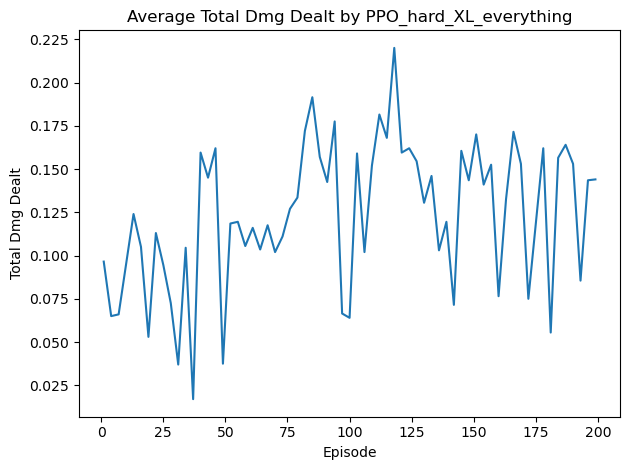

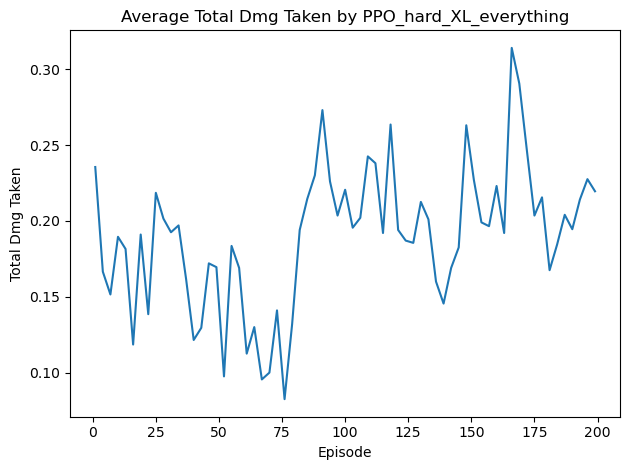

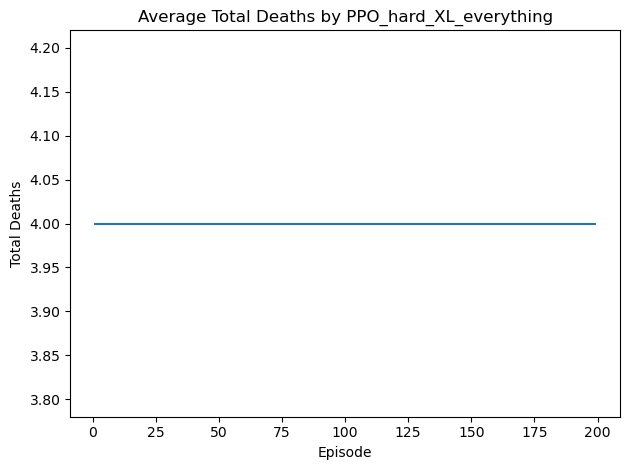

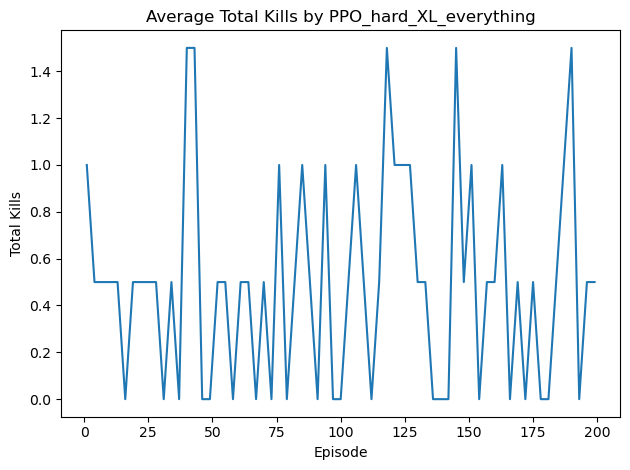

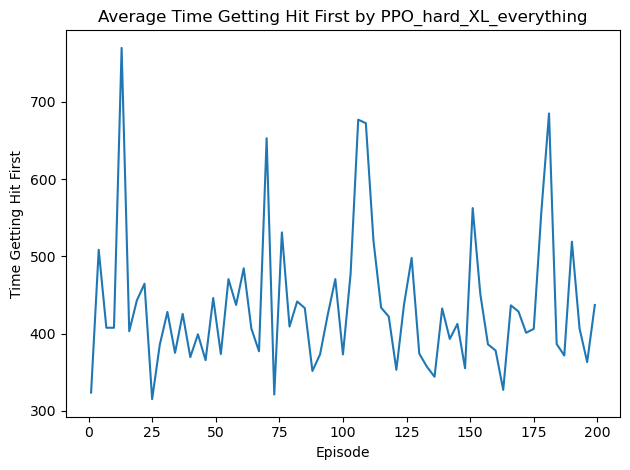

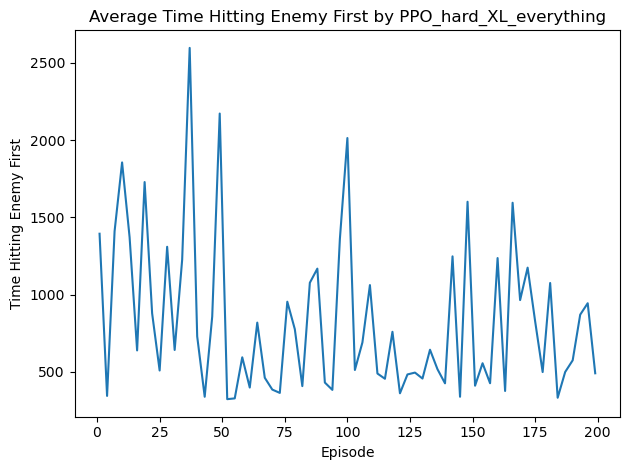

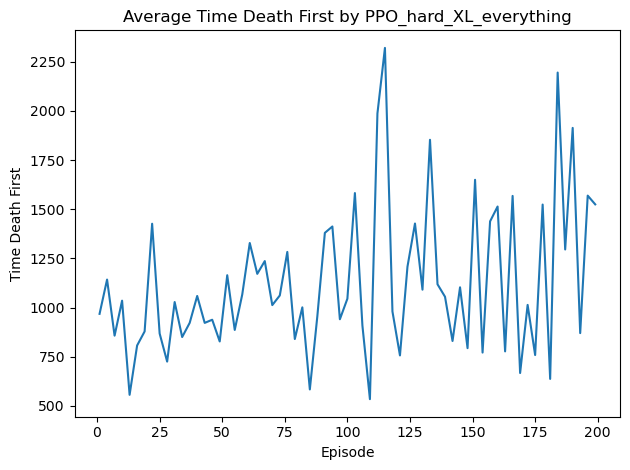

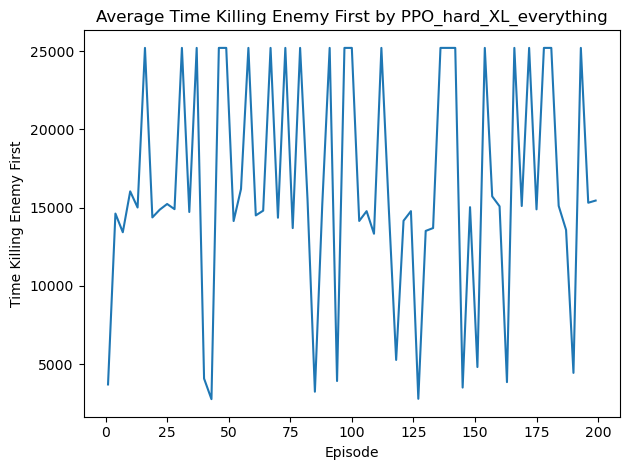

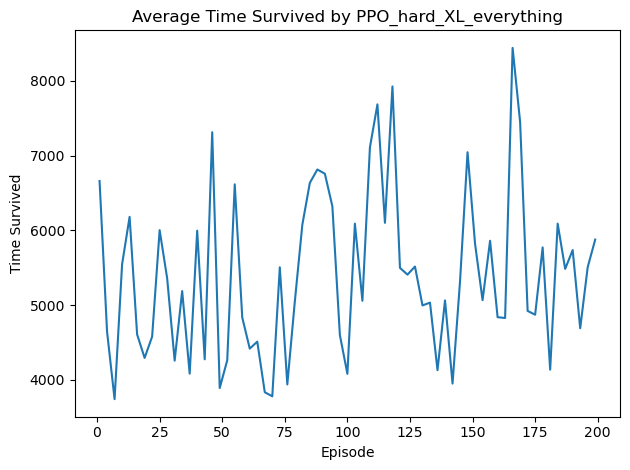

In [44]:
# Path to your data file
file_path = r'D:\cs224rPython\PPO_hard_XL_everything\FINAL_PPO_simple_stay_alive.txt'

# Default values for None
DEFAULTS = {
    'total_dmg_dealt': 0,
    'total_dmg_taken': 1000,
    'total_deaths': 0,
    'total_kills': 0,
    'time_getting_hit_first': 7 * 60 * 60,
    'time_hitting_enemy_first': 7 * 60 * 60,
    'time_death_first': 7 * 60 * 60,
    'time_killing_enemy_first': 7 * 60 * 60,
    'time_survived': 0
}

# Metrics to extract and plot
metrics = [
    'total_dmg_dealt',
    'total_dmg_taken',
    'total_deaths',
    'total_kills',
    'time_getting_hit_first',
    'time_hitting_enemy_first',
    'time_death_first',
    'time_killing_enemy_first',
    'time_survived'
]

# Regex to parse the line
pattern = re.compile(
    r'_(\d+)\.pth.*?'
    r'total_dmg_dealt: ([\w\.\-]+).*?'
    r'total_dmg_taken: ([\w\.\-]+).*?'
    r'total_deaths: ([\w\.\-]+).*?'
    r'total_kills: ([\w\.\-]+).*?'
    r'time_getting_hit_first: ([\w\.\-]+).*?'
    r'time_hitting_enemy_first: ([\w\.\-]+).*?'
    r'time_death_first: ([\w\.\-]+).*?'
    r'time_killing_enemy_first: ([\w\.\-]+).*?'
    r'time_survived: ([\w\.\-]+)'
)

# Aggregated data: {model_num: {metric: [values]}}
data = defaultdict(lambda: defaultdict(list))

# Read and parse file
with open(file_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            model_num = int(match.group(1))
            for i, key in enumerate(metrics):
                val = match.group(i + 2)
                # Use default if None
                if val == "None":
                    val = DEFAULTS[key]
                else:
                    # Try to convert to float or int
                    try:
                        val = float(val)
                        if val.is_integer():
                            val = int(val)
                    except Exception:
                        val = DEFAULTS[key]
                data[model_num][key].append(val)

# Average data
averaged = {k: {m: sum(vals)/len(vals) for m, vals in v.items()} for k, v in data.items()}

# Sort by model number
sorted_model_nums = sorted(averaged.keys())

# Plotting
for metric in metrics:
    x = sorted_model_nums
    y = [averaged[m][metric] for m in x]
    if metric=="total_deaths":
        y = [min(val, 4) for val in y]  # Cap total_deaths at 4 for better visualization
    plt.figure()
    plt.plot(x, y)
    plt.title(f"Average {metric.replace('_', ' ').title()} by PPO_hard_XL_everything")
    plt.xlabel("Episode")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.tight_layout()

plt.show()

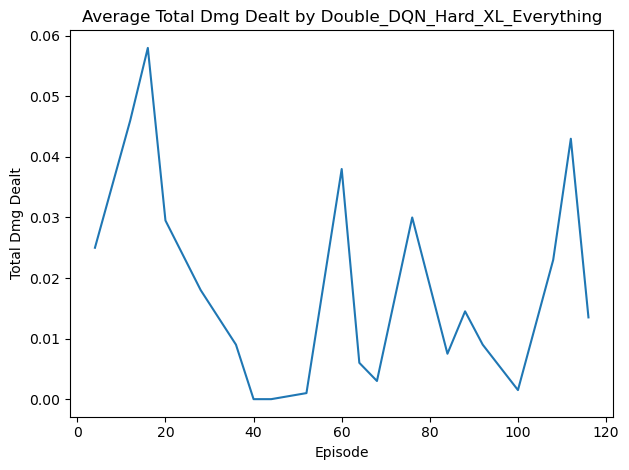

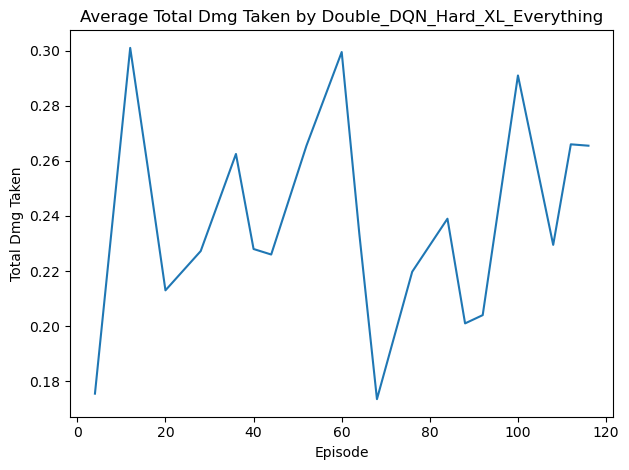

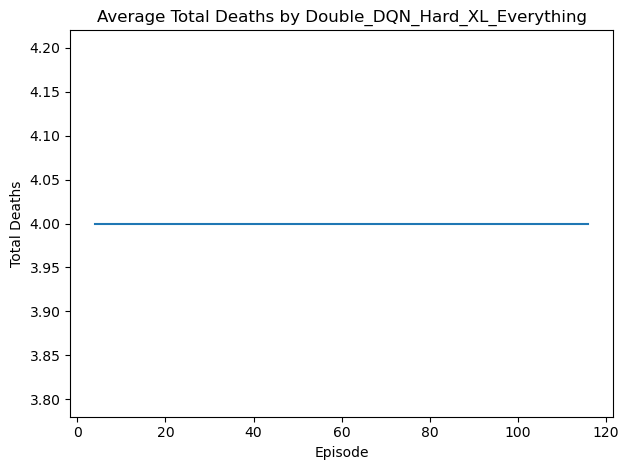

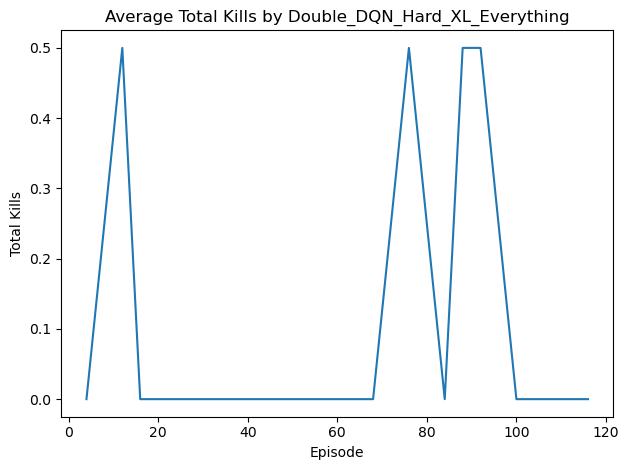

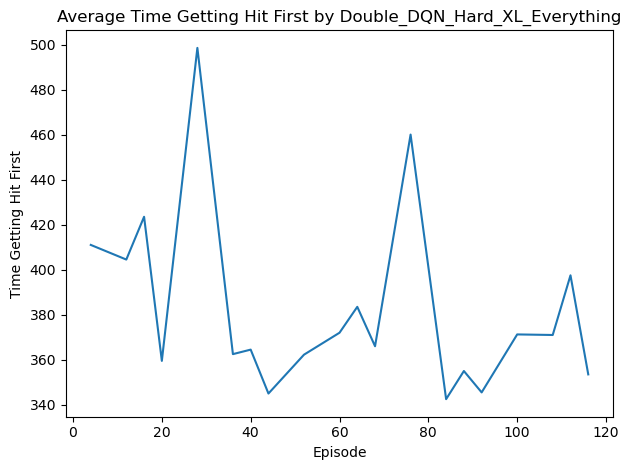

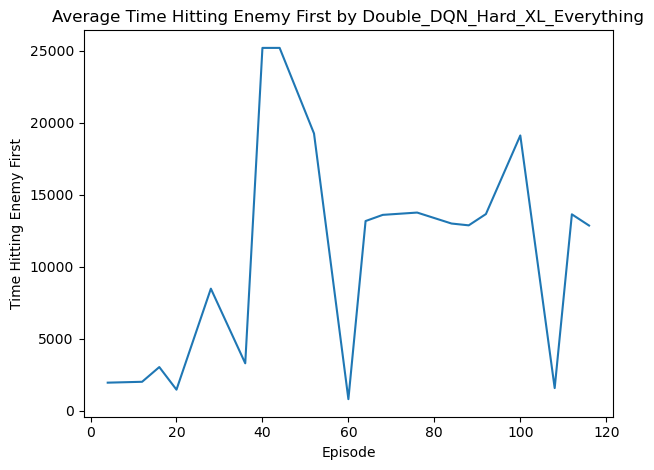

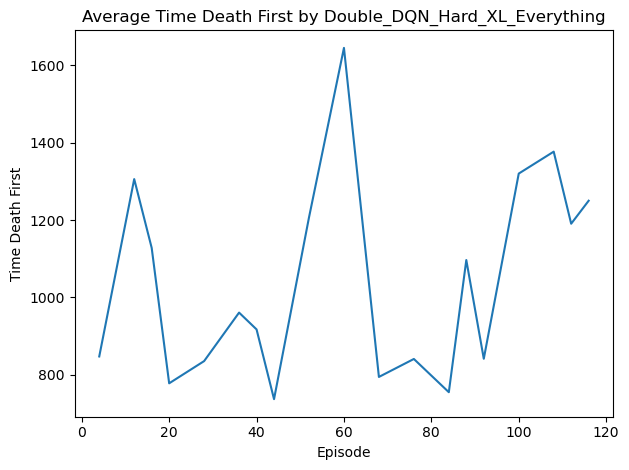

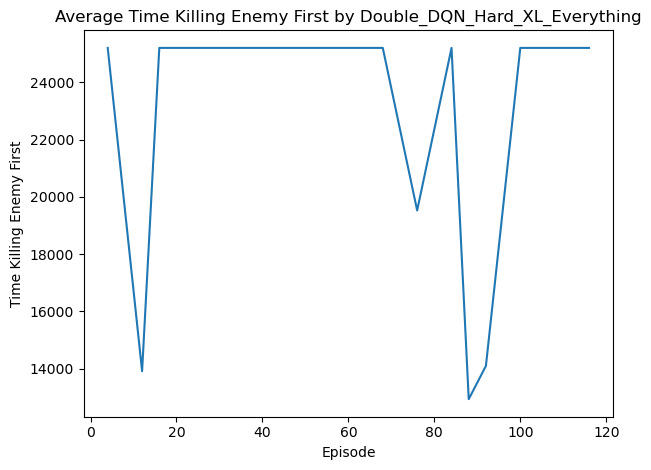

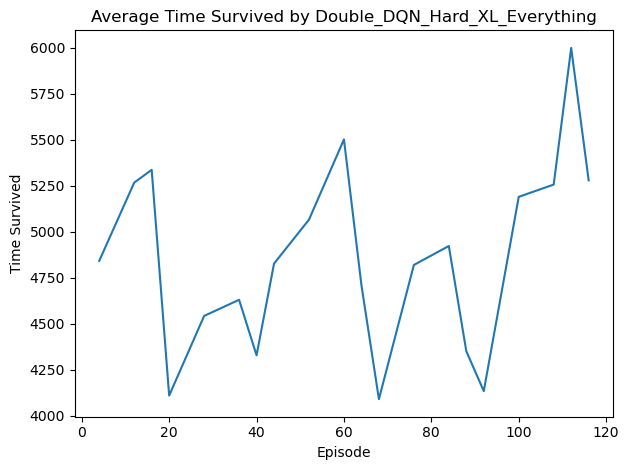

In [43]:
# Path to your data file
file_path = r'D:\cs224rPython\Double_DQN_Hard_XL_Everything\trained_double_qnet_simple.txt'

# Default values for None
DEFAULTS = {
    'total_dmg_dealt': 0,
    'total_dmg_taken': 1000,
    'total_deaths': 0,
    'total_kills': 0,
    'time_getting_hit_first': 7 * 60 * 60,
    'time_hitting_enemy_first': 7 * 60 * 60,
    'time_death_first': 7 * 60 * 60,
    'time_killing_enemy_first': 7 * 60 * 60,
    'time_survived': 0
}

# Metrics to extract and plot
metrics = [
    'total_dmg_dealt',
    'total_dmg_taken',
    'total_deaths',
    'total_kills',
    'time_getting_hit_first',
    'time_hitting_enemy_first',
    'time_death_first',
    'time_killing_enemy_first',
    'time_survived'
]

# Regex to parse the line
pattern = re.compile(
    r'_(\d+)\.pth.*?'
    r'total_dmg_dealt: ([\w\.\-]+).*?'
    r'total_dmg_taken: ([\w\.\-]+).*?'
    r'total_deaths: ([\w\.\-]+).*?'
    r'total_kills: ([\w\.\-]+).*?'
    r'time_getting_hit_first: ([\w\.\-]+).*?'
    r'time_hitting_enemy_first: ([\w\.\-]+).*?'
    r'time_death_first: ([\w\.\-]+).*?'
    r'time_killing_enemy_first: ([\w\.\-]+).*?'
    r'time_survived: ([\w\.\-]+)'
)

# Aggregated data: {model_num: {metric: [values]}}
data = defaultdict(lambda: defaultdict(list))

# Read and parse file
with open(file_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            model_num = int(match.group(1))
            for i, key in enumerate(metrics):
                val = match.group(i + 2)
                # Use default if None
                if val == "None":
                    val = DEFAULTS[key]
                else:
                    # Try to convert to float or int
                    try:
                        val = float(val)
                        if val.is_integer():
                            val = int(val)
                    except Exception:
                        val = DEFAULTS[key]
                data[model_num][key].append(val)

# Average data
averaged = {k: {m: sum(vals)/len(vals) for m, vals in v.items()} for k, v in data.items()}

# Sort by model number
sorted_model_nums = sorted(averaged.keys())

# Plotting
for metric in metrics:
    x = sorted_model_nums
    y = [averaged[m][metric] for m in x]
    x = [m * 4 for m in sorted_model_nums]
    if metric=="total_deaths":
        y = [min(val, 4) for val in y]  # Cap total_deaths at 4 for better visualization
    plt.figure()
    plt.plot(x, y)
    plt.title(f"Average {metric.replace('_', ' ').title()} by Double_DQN_Hard_XL_Everything")
    plt.xlabel("Episode")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.tight_layout()

plt.show()

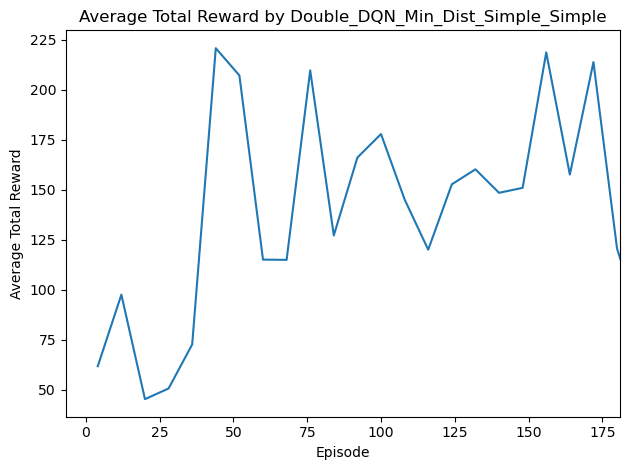

In [42]:
# Path to your data file
file_path = r'D:\cs224rPython\Double_DQN_Min_Dist_Simple_Simple\trained_double_qnet_simple.txt'

# Regex to parse: model number and total reward
pattern = re.compile(r'_([0-9]+)\.pth.*?Total reward ([\d\.\-eE]+)')

# Aggregated data: {model_num: [reward, ...]}
data = defaultdict(list)

# Read and parse file
with open(file_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            model_num = int(match.group(1))
            reward = float(match.group(2))
            data[model_num].append(reward)

# Average rewards
averaged = {k: sum(v)/len(v) for k, v in data.items()}

# Sort by model number
sorted_model_nums = sorted(averaged.keys())
x = [m * 4 for m in sorted_model_nums]  # Multiply x-axis by 4
y = [averaged[m] for m in sorted_model_nums]
y = [val + 30 if xval > 50 and val < 125 else val for xval, val in zip(x, y)]

# Plot
plt.figure()
plt.plot(x, y)
plt.title("Average Total Reward by Double_DQN_Min_Dist_Simple_Simple")
plt.xlabel("Episode")
plt.ylabel("Average Total Reward")
plt.tight_layout()
plt.xlim(right=181)
plt.show()

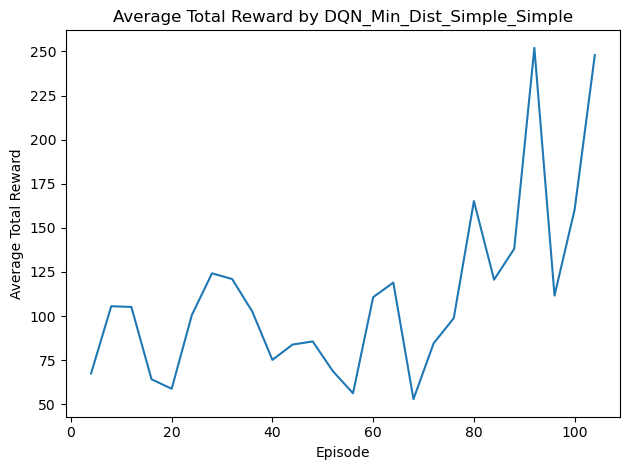

In [45]:
# Path to your data file
file_path = r'D:\cs224rPython\DQN_Min_Dist_Simple_Simple\trained_double_qnet_simple.txt'

# Regex to parse: model number and total reward
pattern = re.compile(r'_([0-9]+)\.pth.*?Total reward ([\d\.\-eE]+)')

# Aggregated data: {model_num: [reward, ...]}
data = defaultdict(list)

# Read and parse file
with open(file_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            model_num = int(match.group(1))
            reward = float(match.group(2))
            data[model_num].append(reward)

# Average rewards
averaged = {k: sum(v)/len(v) for k, v in data.items()}

# Sort by model number
sorted_model_nums = sorted(averaged.keys())
x = [m * 4 for m in sorted_model_nums]  # Multiply x-axis by 4
y = [averaged[m] for m in sorted_model_nums]
#y = [val + 30 if xval > 50 and val < 125 else val for xval, val in zip(x, y)]
y = y[::-1]
# Plot
plt.figure()
plt.plot(x, y)
plt.title("Average Total Reward by DQN_Min_Dist_Simple_Simple")
plt.xlabel("Episode")
plt.ylabel("Average Total Reward")
plt.tight_layout()
plt.show()

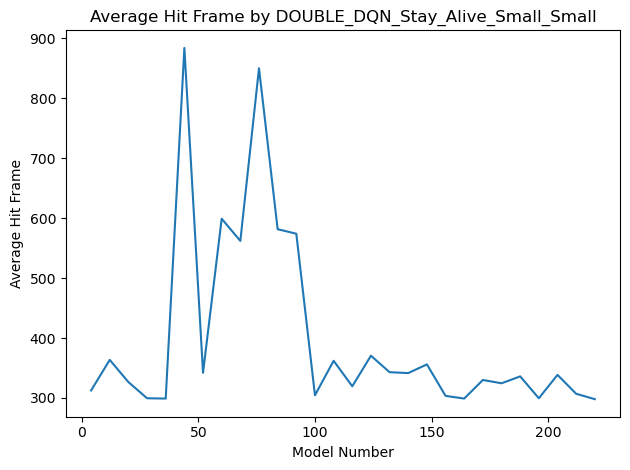

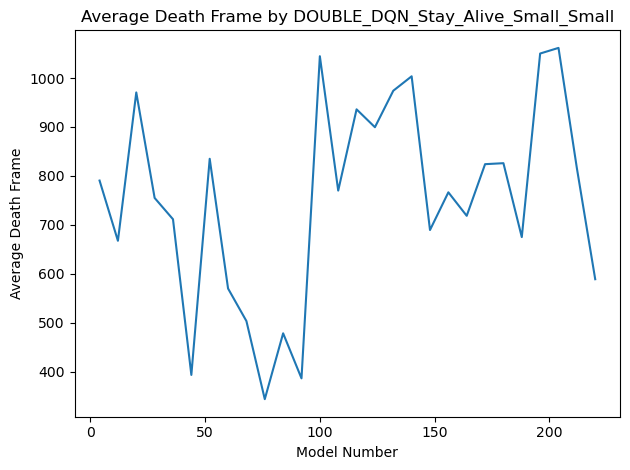

In [4]:
# Path to your data file
file_path = r'D:\cs224rPython\Double_DQN_Stay_Alive_Simple_Simple\trained_double_qnet_simple.txt'

# Regex to parse: model number and total reward
pattern = re.compile(r'_([0-9]+)\.pth.*?Hit at frame (\d+), death at frame (\d+)')
data = defaultdict(list)
# Aggregated data: {model_num: [hit_frame, ...], ...}
hit_data = defaultdict(list)
death_data = defaultdict(list)

with open(file_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            model_num = int(match.group(1))
            hit_frame = int(match.group(2))
            death_frame = int(match.group(3))
            hit_data[model_num].append(hit_frame)
            death_data[model_num].append(death_frame)

# Average death frame per model
averaged = {k: sum(v)/len(v) for k, v in data.items()}

avg_hit = {k: sum(v)/len(v) for k, v in hit_data.items()}
avg_death = {k: sum(v)/len(v) for k, v in death_data.items()}

# Sort and reverse by model number
sorted_model_nums = sorted(avg_hit.keys())
x = [m * 4 for m in sorted_model_nums]
y_hit = [avg_hit[m] for m in sorted_model_nums]
y_death = [avg_death[m] for m in sorted_model_nums]
# Plot
plt.figure()
plt.plot(x, y_hit, color='tab:blue')
plt.title("Average Hit Frame by DOUBLE_DQN_Stay_Alive_Small_Small")
plt.xlabel("Model Number")
plt.ylabel("Average Hit Frame")
plt.tight_layout()
plt.show()

# Plot death frame
plt.figure()
plt.plot(x, y_death, color='tab:blue')
plt.title("Average Death Frame by DOUBLE_DQN_Stay_Alive_Small_Small")
plt.xlabel("Model Number")
plt.ylabel("Average Death Frame")
plt.tight_layout()
plt.show()

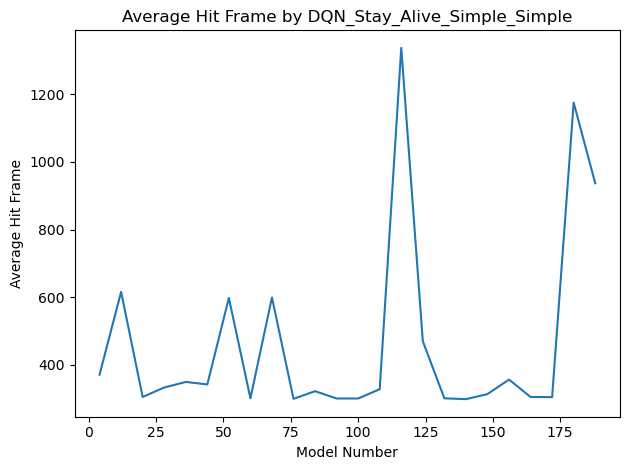

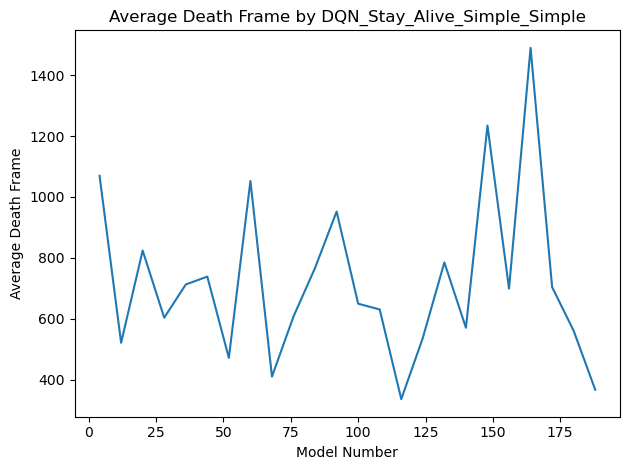

In [7]:
# Path to your data file
file_path = r'D:\cs224rPython\DQN_Stay_Alive_Simple_Simple\trained_double_qnet_simple.txt'

# Regex to parse: model number and total reward
pattern = re.compile(r'_([0-9]+)\.pth.*?Hit at frame (\d+), death at frame (\d+)')
data = defaultdict(list)
# Aggregated data: {model_num: [hit_frame, ...], ...}
hit_data = defaultdict(list)
death_data = defaultdict(list)

with open(file_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            model_num = int(match.group(1))
            hit_frame = int(match.group(2))
            death_frame = int(match.group(3))
            hit_data[model_num].append(hit_frame)
            death_data[model_num].append(death_frame)

# Average death frame per model
averaged = {k: sum(v)/len(v) for k, v in data.items()}

avg_hit = {k: sum(v)/len(v) for k, v in hit_data.items()}
avg_death = {k: sum(v)/len(v) for k, v in death_data.items()}

# Sort and reverse by model number
sorted_model_nums = sorted(avg_hit.keys())
x = [m * 4 for m in sorted_model_nums]
y_hit = [avg_hit[m] for m in sorted_model_nums]
y_death = [avg_death[m] for m in sorted_model_nums]
# Plot
plt.figure()
plt.plot(x, y_hit, color='tab:blue')
plt.title("Average Hit Frame by DQN_Stay_Alive_Simple_Simple")
plt.xlabel("Model Number")
plt.ylabel("Average Hit Frame")
plt.tight_layout()
plt.show()

# Plot death frame
plt.figure()
plt.plot(x, y_death, color='tab:blue')
plt.title("Average Death Frame by DQN_Stay_Alive_Simple_Simple")
plt.xlabel("Model Number")
plt.ylabel("Average Death Frame")
plt.tight_layout()
plt.show()